<a href="https://colab.research.google.com/github/ShivShankar95/MLPClassifier/blob/master/ANN_BreastCancerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

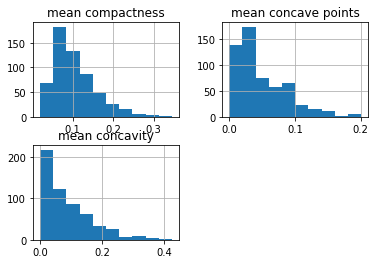

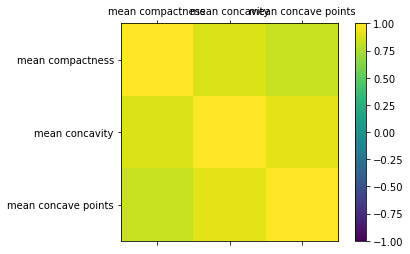

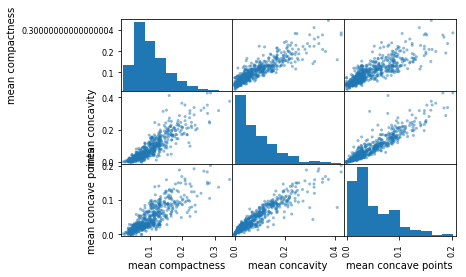

In [1]:
# ANN - Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
import numpy as np
from pandas.plotting import scatter_matrix
cancer = load_breast_cancer()
cancer.keys()
cancer['data'].shape
import numpy as np
import pandas as pd
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
# use describe on dataframe
df.describe()
# let's plot the data
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# histogram of some selected features
df.iloc[:, 5:8].hist()
# let's plot correlations
correlations = df.iloc[:,5:8].corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.iloc[:, 5:8].columns)
ax.set_yticklabels(df.iloc[:, 5:8].columns)
plt.show()
# let's create a scatterplot
scatter_matrix(df.iloc[:, 5:8])
plt.show()


X = cancer['data']
y = cancer['target']

In [2]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
predictions = mlp.predict(X_test)
print(predictions)

[0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 0
 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1
 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1]


In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[58  1]
 [ 2 82]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.99      0.98      0.98        84

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

